# Self Text Impact Study (Does longer question text lead to higher similarity between physician and LLM responses?)

In [1]:
import pandas as pd

reddit_data = pd.read_csv("reddit_data_with_all_similarity.csv")

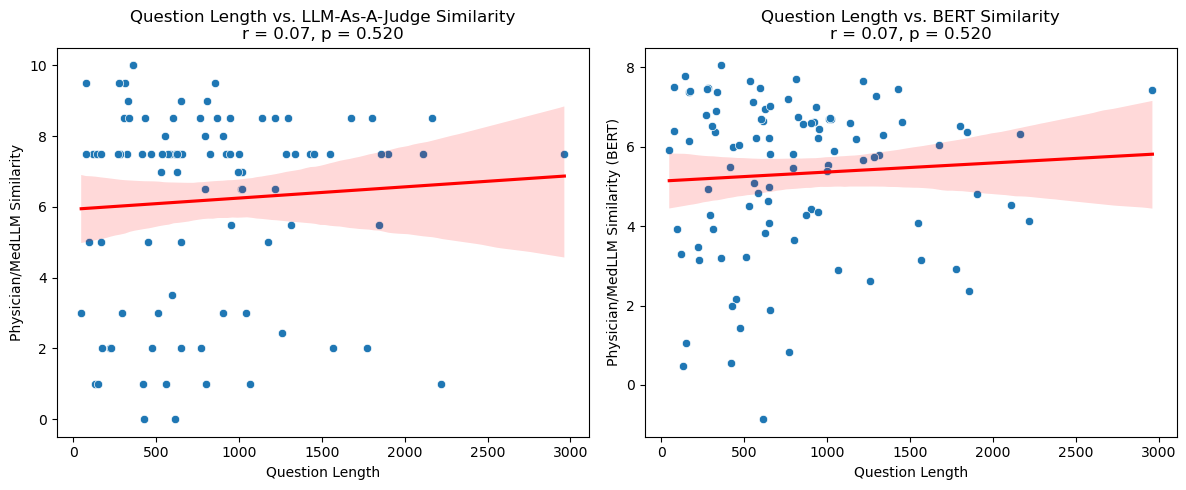

In [3]:
reddit_data['selftext_length'] = reddit_data['combined_text'].fillna("").apply(len)

reddit_data = reddit_data[reddit_data['selftext_length'] <= 6000]

length = reddit_data['selftext_length']
similarity_phys_med = reddit_data['Physician/MedLLM Response Similarity']
similarity_phys_med_bert = reddit_data['Expert/MedLLM Response Similarity (BERT)']

from scipy.stats import pearsonr
corr_basic, pval_basic = pearsonr(length, similarity_phys_med)
corr_bert, pval_bert = pearsonr(length, similarity_phys_med_bert)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# LLM as Judge similarity plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=length, y=similarity_phys_med)
sns.regplot(x=length, y=similarity_phys_med, scatter=False, color='red')
plt.title(f'Question Length vs. LLM-As-A-Judge Similarity\nr = {corr_basic:.2f}, p = {pval_basic:.3f}')
plt.xlabel('Question Length')
plt.ylabel('Physician/MedLLM Similarity')

# BERT similarity plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=length, y=similarity_phys_med_bert)
sns.regplot(x=length, y=similarity_phys_med_bert, scatter=False, color='red')
plt.title(f'Question Length vs. BERT Similarity\nr = {corr_bert:.2f}, p = {pval_bert:.3f}')
plt.xlabel('Question Length')
plt.ylabel('Physician/MedLLM Similarity (BERT)')

plt.tight_layout()
plt.show()

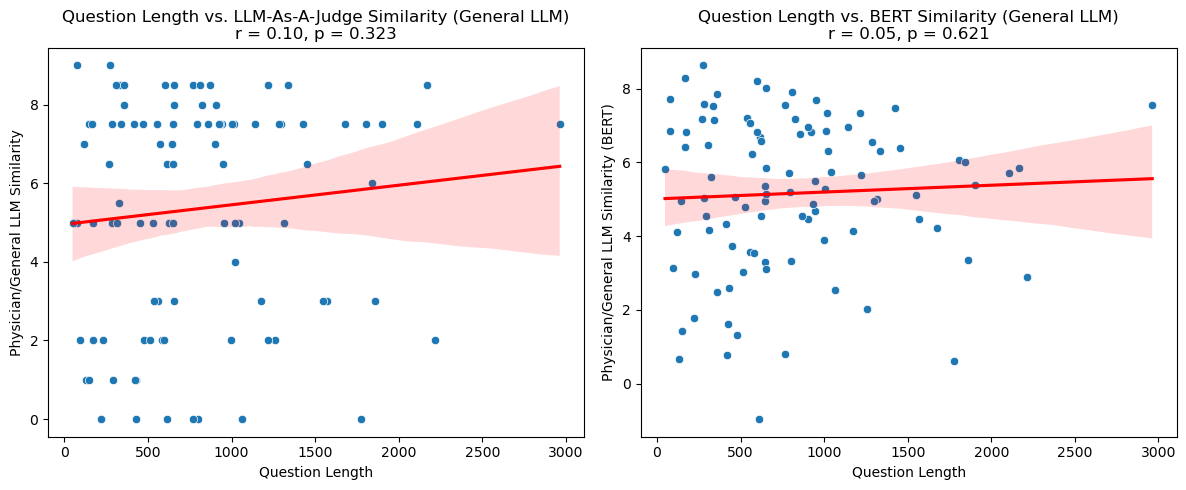

In [4]:
similarity_phys_gen = reddit_data['Expert/General LLM Response Similarity']
similarity_phys_gen_bert = reddit_data['Expert/General LLM Response Similarity (BERT)']

corr_basic_gen, pval_basic_gen = pearsonr(length, similarity_phys_gen)
corr_bert_gen, pval_bert_gen = pearsonr(length, similarity_phys_gen_bert)

plt.figure(figsize=(12, 5))

# LLM as Judge similarity plot (General LLM)
plt.subplot(1, 2, 1)
sns.scatterplot(x=length, y=similarity_phys_gen)
sns.regplot(x=length, y=similarity_phys_gen, scatter=False, color='red')
plt.title(f'Question Length vs. LLM-As-A-Judge Similarity (General LLM)\nr = {corr_basic_gen:.2f}, p = {pval_basic_gen:.3f}')
plt.xlabel('Question Length')
plt.ylabel('Physician/General LLM Similarity')

# BERT similarity plot (General LLM)
plt.subplot(1, 2, 2)
sns.scatterplot(x=length, y=similarity_phys_gen_bert)
sns.regplot(x=length, y=similarity_phys_gen_bert, scatter=False, color='red')
plt.title(f'Question Length vs. BERT Similarity (General LLM)\nr = {corr_bert_gen:.2f}, p = {pval_bert_gen:.3f}')
plt.xlabel('Question Length')
plt.ylabel('Physician/General LLM Similarity (BERT)')

plt.tight_layout()
plt.show()

# SelfText Sentiment Analysis (Does selftext sentiment correspond with higher/lower similarity scores between physician and LLM responses?)

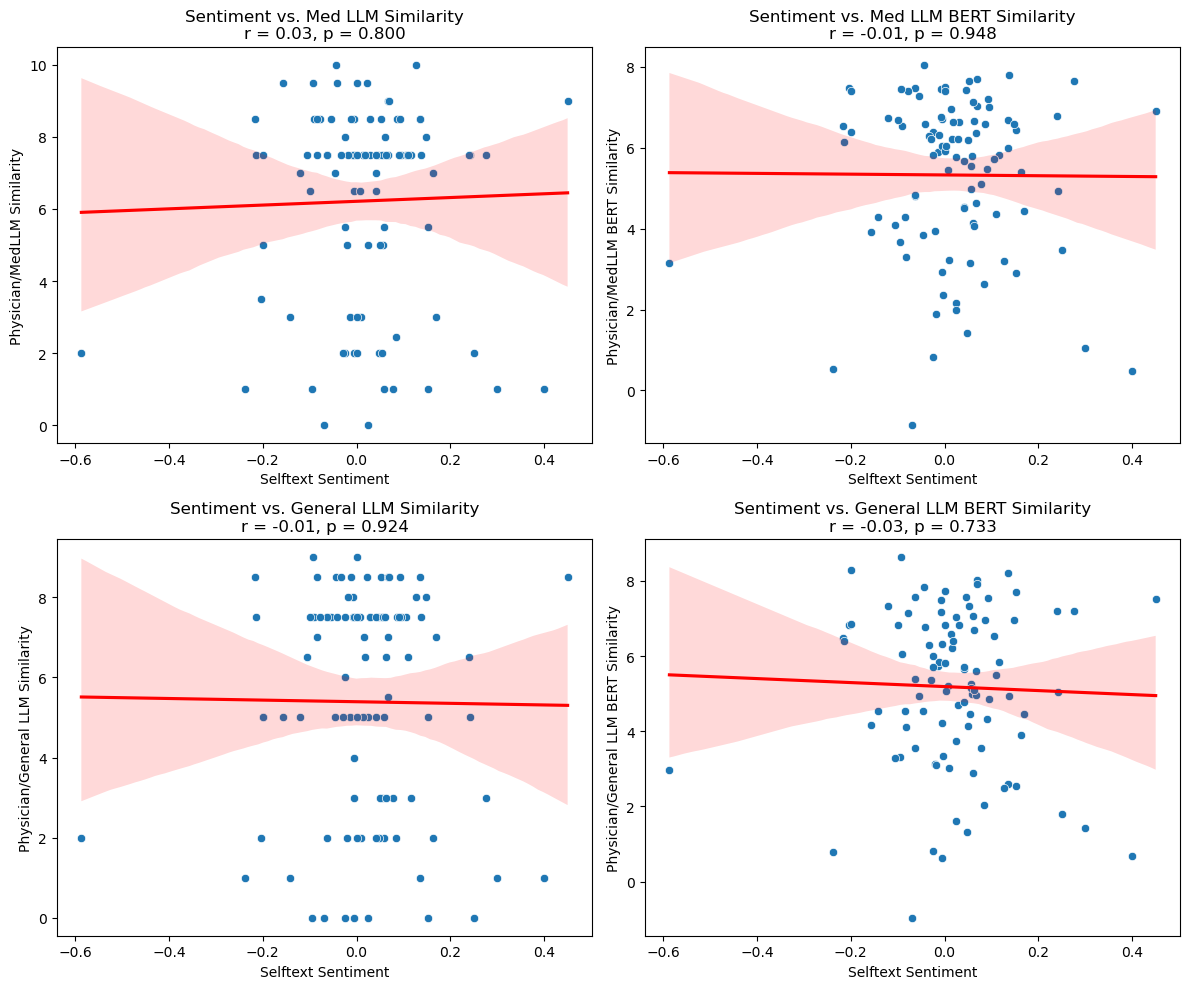

In [4]:
from textblob import TextBlob

reddit_data['selftext_sentiment'] = reddit_data['combined_text'].fillna("").apply(lambda x: TextBlob(x).sentiment.polarity)
sentiment = reddit_data['selftext_sentiment']

corr_sent_med, pval_sent_med = pearsonr(sentiment, similarity_phys_med)
corr_sent_med_bert, pval_sent_med_bert = pearsonr(sentiment, similarity_phys_med_bert)

corr_sent_gen, pval_sent_gen = pearsonr(sentiment, similarity_phys_gen)
corr_sent_gen_bert, pval_sent_gen_bert = pearsonr(sentiment, similarity_phys_gen_bert)

plt.figure(figsize=(12, 10))

# Medical LLM - LLM as Judge
plt.subplot(2, 2, 1)
sns.scatterplot(x=sentiment, y=similarity_phys_med)
sns.regplot(x=sentiment, y=similarity_phys_med, scatter=False, color='red')
plt.title(f'Sentiment vs. Med LLM Similarity\nr = {corr_sent_med:.2f}, p = {pval_sent_med:.3f}')
plt.xlabel('Selftext Sentiment')
plt.ylabel('Physician/MedLLM Similarity')

# Medical LLM - BERT
plt.subplot(2, 2, 2)
sns.scatterplot(x=sentiment, y=similarity_phys_med_bert)
sns.regplot(x=sentiment, y=similarity_phys_med_bert, scatter=False, color='red')
plt.title(f'Sentiment vs. Med LLM BERT Similarity\nr = {corr_sent_med_bert:.2f}, p = {pval_sent_med_bert:.3f}')
plt.xlabel('Selftext Sentiment')
plt.ylabel('Physician/MedLLM BERT Similarity')

# General LLM - LLM as Judge
plt.subplot(2, 2, 3)
sns.scatterplot(x=sentiment, y=similarity_phys_gen)
sns.regplot(x=sentiment, y=similarity_phys_gen, scatter=False, color='red')
plt.title(f'Sentiment vs. General LLM Similarity\nr = {corr_sent_gen:.2f}, p = {pval_sent_gen:.3f}')
plt.xlabel('Selftext Sentiment')
plt.ylabel('Physician/General LLM Similarity')

# General LLM - BERT
plt.subplot(2, 2, 4)
sns.scatterplot(x=sentiment, y=similarity_phys_gen_bert)
sns.regplot(x=sentiment, y=similarity_phys_gen_bert, scatter=False, color='red')
plt.title(f'Sentiment vs. General LLM BERT Similarity\nr = {corr_sent_gen_bert:.2f}, p = {pval_sent_gen_bert:.3f}')
plt.xlabel('Selftext Sentiment')
plt.ylabel('Physician/General LLM BERT Similarity')

plt.tight_layout()
plt.show()

# Does the medical topic influence similarity scores?

In [13]:
!pip install ace_tools

  Obtaining dependency information for ace_tools from https://files.pythonhosted.org/packages/27/c4/402d3ae2ecbfe72fbdcb2769f55580f1c54a3ca110c44e1efc034516a499/ace_tools-0.0-py3-none-any.whl.metadata


In [5]:
import numpy as np

def assign_topic(text):
    text = text.lower()
    if any(keyword in text for keyword in ['chest', 'heart', 'palpitation', 'cardio']):
        return 'Cardio'
    elif any(keyword in text for keyword in ['cough', 'breath', 'asthma', 'lung', 'respiratory']):
        return 'Respiratory'
    elif any(keyword in text for keyword in ['headache', 'seizure', 'numb', 'neuro', 'brain']):
        return 'Neuro'
    elif any(keyword in text for keyword in ['stomach', 'colon', 'nausea', 'vomit', 'abdominal', 'gi']):
        return 'GI'
    elif any(keyword in text for keyword in ['rash', 'skin', 'acne', 'eczema', 'psoriasis']):
        return 'Derm'
    elif any(keyword in text for keyword in ['anxiety', 'depression', 'mental', 'psych', 'panic']):
        return 'Psych'
    else:
        return 'General'

reddit_data['topic'] = reddit_data['combined_text'].apply(assign_topic)

topic_summary = reddit_data.groupby('topic')[
    ['Physician/MedLLM Response Similarity',
     'Expert/MedLLM Response Similarity (BERT)',
     'Expert/General LLM Response Similarity',
     'Expert/General LLM Response Similarity (BERT)']
].mean().round(2).reset_index()

topic_summary

,topic,Physician/MedLLM Response Similarity,Expert/MedLLM Response Similarity (BERT),Expert/General LLM Response Similarity,Expert/General LLM Response Similarity (BERT)
0,Cardio,6.47,5.11,5.91,4.99
1,Derm,6.00,5.92,5.10,5.57
2,GI,6.00,5.49,5.70,5.37
3,General,6.39,5.29,5.40,5.24
4,Neuro,6.19,4.87,4.62,4.21
5,Psych,3.00,4.28,1.00,4.54
6,Respiratory,6.21,5.67,4.64,5.58


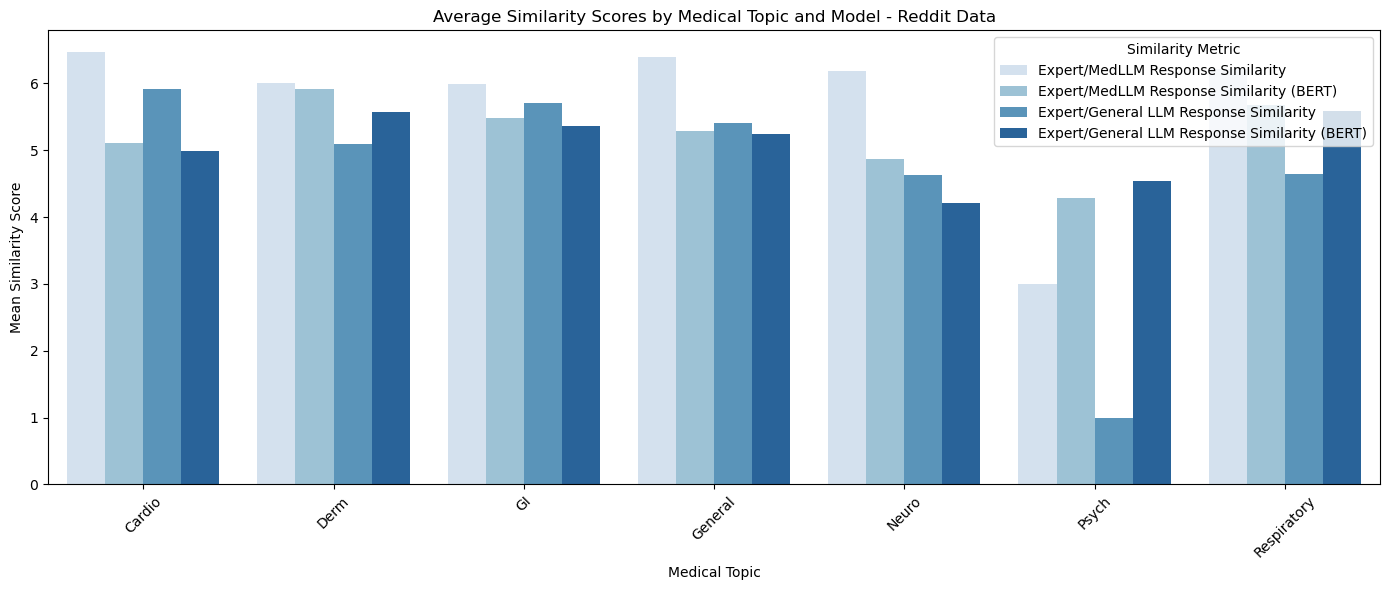

,F-statistic,p-value
Physician/MedLLM,0.2977,0.9366
MedLLM BERT,0.2855,0.9425
General LLM,0.7394,0.6193
General LLM BERT,0.4260,0.8599


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

plt.figure(figsize=(14, 6))

melted = reddit_data.groupby('topic')[
    ['Physician/MedLLM Response Similarity',
     'Expert/MedLLM Response Similarity (BERT)',
     'Expert/General LLM Response Similarity',
     'Expert/General LLM Response Similarity (BERT)']
].mean().reset_index().melt(id_vars='topic', var_name='Metric', value_name='Similarity')

melted['Metric'] = melted['Metric'].replace({
    'Physician/MedLLM Response Similarity': 'Expert/MedLLM Response Similarity',

})

sns.barplot(data=melted, x='topic', y='Similarity', hue='Metric', palette='Blues')
plt.title('Average Similarity Scores by Medical Topic and Model - Reddit Data')
plt.ylabel('Mean Similarity Score')
plt.xlabel('Medical Topic')
plt.xticks(rotation=45)
plt.legend(title='Similarity Metric')
plt.tight_layout()
plt.show()

anova_results = {
    'Physician/MedLLM': f_oneway(*[group['Physician/MedLLM Response Similarity'].values
                                   for name, group in reddit_data.groupby('topic')]),
    'MedLLM BERT': f_oneway(*[group['Expert/MedLLM Response Similarity (BERT)'].values
                              for name, group in reddit_data.groupby('topic')]),
    'General LLM': f_oneway(*[group['Expert/General LLM Response Similarity'].values
                              for name, group in reddit_data.groupby('topic')]),
    'General LLM BERT': f_oneway(*[group['Expert/General LLM Response Similarity (BERT)'].values
                                   for name, group in reddit_data.groupby('topic')])
}

anova_results = {k: {'F-statistic': v.statistic, 'p-value': v.pvalue} for k, v in anova_results.items()}
pd.DataFrame(anova_results).T.round(4)

# OLS Regression (Which features are significant in getting a better LLM response?)

In [22]:
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


# Prepare the updated 5 features
reddit_data['title'] = reddit_data['title'].fillna("")
reddit_data['selftext'] = reddit_data['selftext'].fillna("")

# Features
reddit_data['title_length'] = reddit_data['title'].apply(len)
reddit_data['selftext_length'] = reddit_data['selftext'].apply(len)
reddit_data['num_question_marks'] = reddit_data['selftext'].apply(lambda x: x.count('?'))
reddit_data['selftext_sentiment'] = reddit_data['selftext'].apply(lambda x: TextBlob(x).sentiment.polarity)
reddit_data['has_image_link'] = reddit_data['selftext'].apply(lambda x: int('http' in x and any(ext in x for ext in ['.jpg', '.png', '.jpeg', '.gif'])))

# Select 5 manual features
X_selected = reddit_data[[
    'title_length',
    'selftext_length',
    'num_question_marks',
    'selftext_sentiment',
    'has_image_link'
]]
y = reddit_data['Physician/MedLLM Response Similarity']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Linear Regression
lr_final = LinearRegression()
lr_final.fit(X_train, y_train)
y_pred_final = lr_final.predict(X_test)

# Performance
r2_final = r2_score(y_test, y_pred_final)
mse_final = mean_squared_error(y_test, y_pred_final)

# Coefficients
coef_final = pd.DataFrame({
    'Feature': X_selected.columns,
    'Coefficient': lr_final.coef_
}).round(4)

r2_final, mse_final, coef_final

(0.04277305689106714,
 7.276149345064875,
               Feature  Coefficient
 0        title_length      -0.0041
 1     selftext_length       0.0001
 2  num_question_marks       0.4147
 3  selftext_sentiment       2.4938
 4      has_image_link       0.0511)

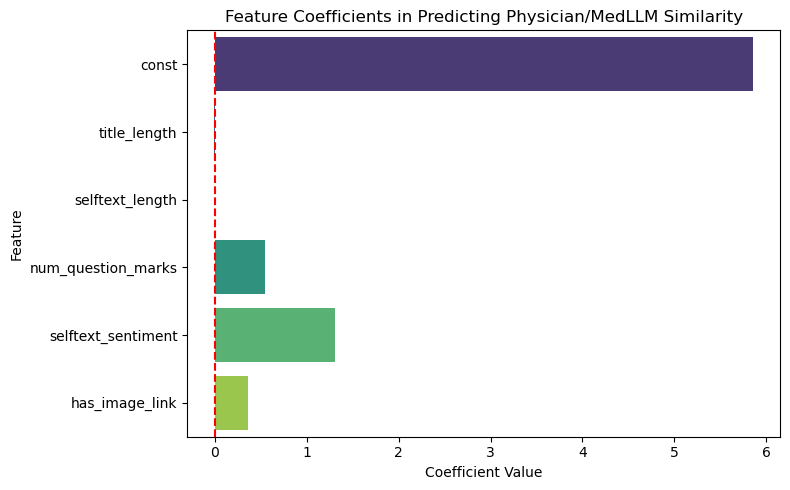

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,5.8576,0.6671,8.7809,0.0000,4.5329,7.1823
title_length,-0.0074,0.0091,-0.8128,0.4184,-0.0254,0.0106
selftext_length,0.0000,0.0004,0.0608,0.9516,-0.0007,0.0008
num_question_marks,0.5418,0.2452,2.2099,0.0296,0.0549,1.0286
selftext_sentiment,1.3093,2.1000,0.6235,0.5345,-2.8608,5.4794
has_image_link,0.3567,1.3951,0.2557,0.7988,-2.4137,3.1271


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

X_sm = sm.add_constant(X_selected)
model_sm = sm.OLS(y, X_sm).fit()

In [26]:
print(model_sm.summary())

                                     OLS Regression Results                                     
Dep. Variable:     Physician/MedLLM Response Similarity   R-squared:                       0.077
Model:                                              OLS   Adj. R-squared:                  0.028
Method:                                   Least Squares   F-statistic:                     1.560
Date:                                  Tue, 20 May 2025   Prob (F-statistic):              0.179
Time:                                          13:46:28   Log-Likelihood:                -235.56
No. Observations:                                    99   AIC:                             483.1
Df Residuals:                                        93   BIC:                             498.7
Df Model:                                             5                                         
Covariance Type:                              nonrobust                                         
                         coef 